In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
%config InlineBackend.figure_format = 'retina' 

HW2

Part 1:

In [112]:
for i in range(4):
    print(i)

0
1
2
3


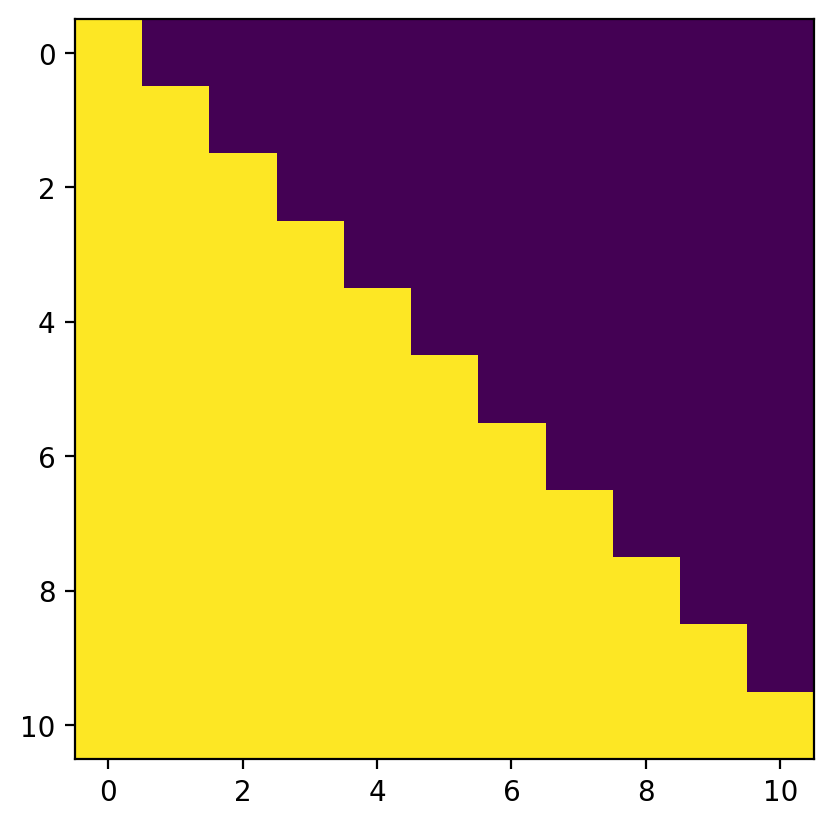

In [113]:
n = 11
data = np.zeros((n,n))

for i in range(11):
    for j in range(i + 1):
        data[i,j]=1

plt.imshow(data, interpolation='nearest')
plt.show()

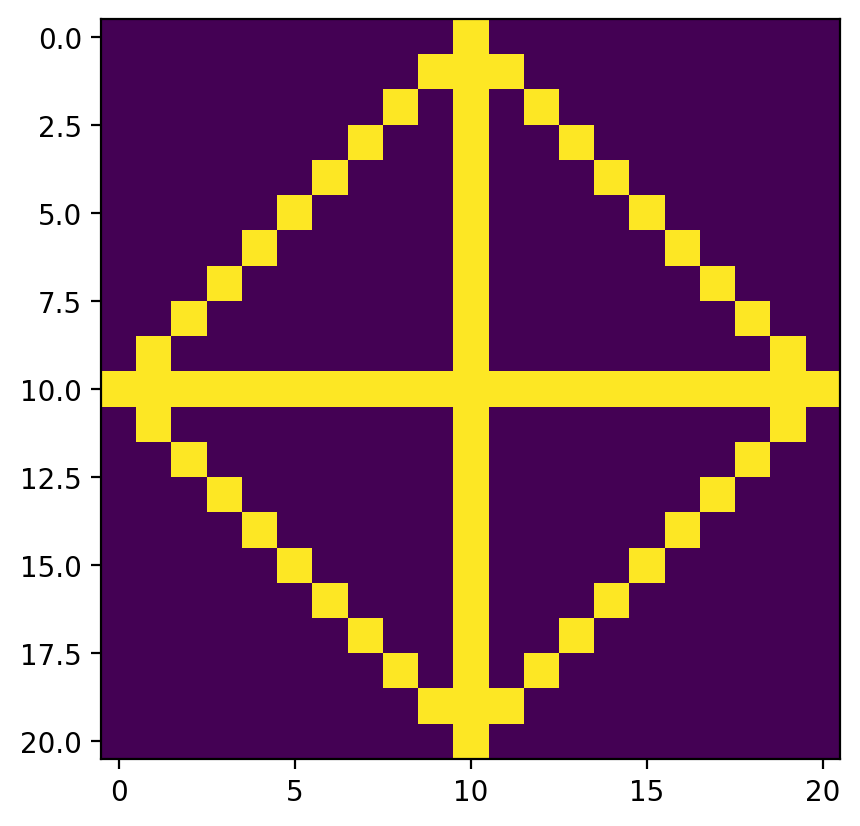

In [114]:
n = 21
data = np.zeros((n,n))

for i in range(21):
    data[10, i] = 1
    data[i, 10] = 1

for i in range(10):
    data[10-i, i] = 1
    data[10+i, i] = 1
    data[i, 10+i] = 1
    data[20-i, 10+i] = 1

plt.imshow(data, interpolation='nearest')
plt.show()

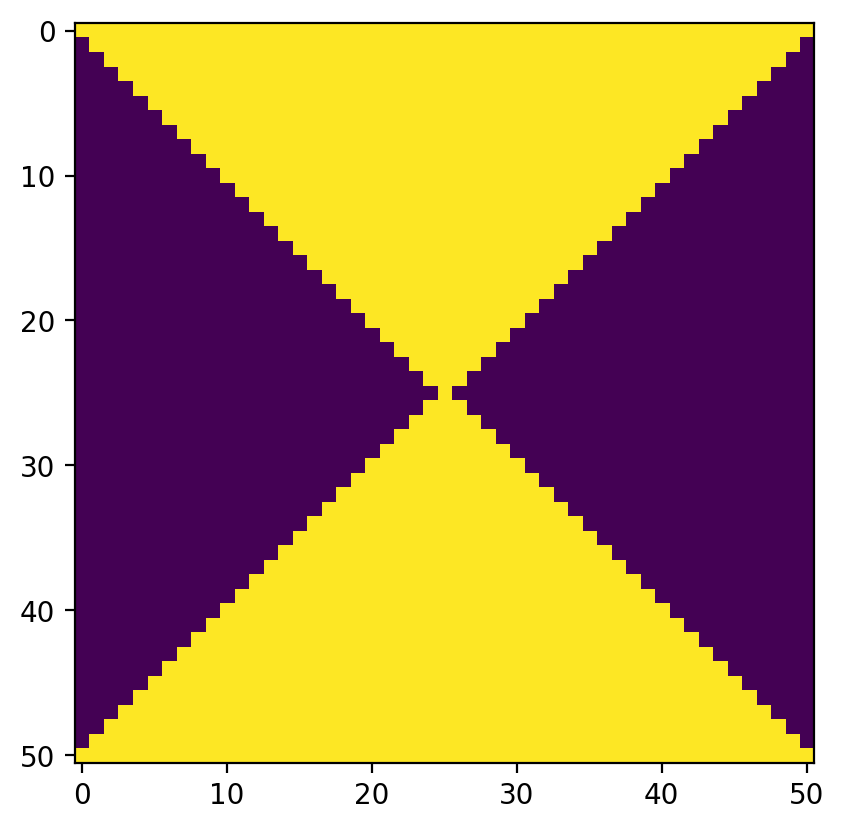

In [115]:
n = 51
data = np.zeros((n,n))

for i in range(25):
    for j in range(51-2*i):
        data[i,j + i] = 1

for i in range(25):
    for j in range(51-2*i):
        data[50-i,j + i] = 1

data[25,25] = 1

plt.imshow(data, interpolation='nearest')
plt.show()

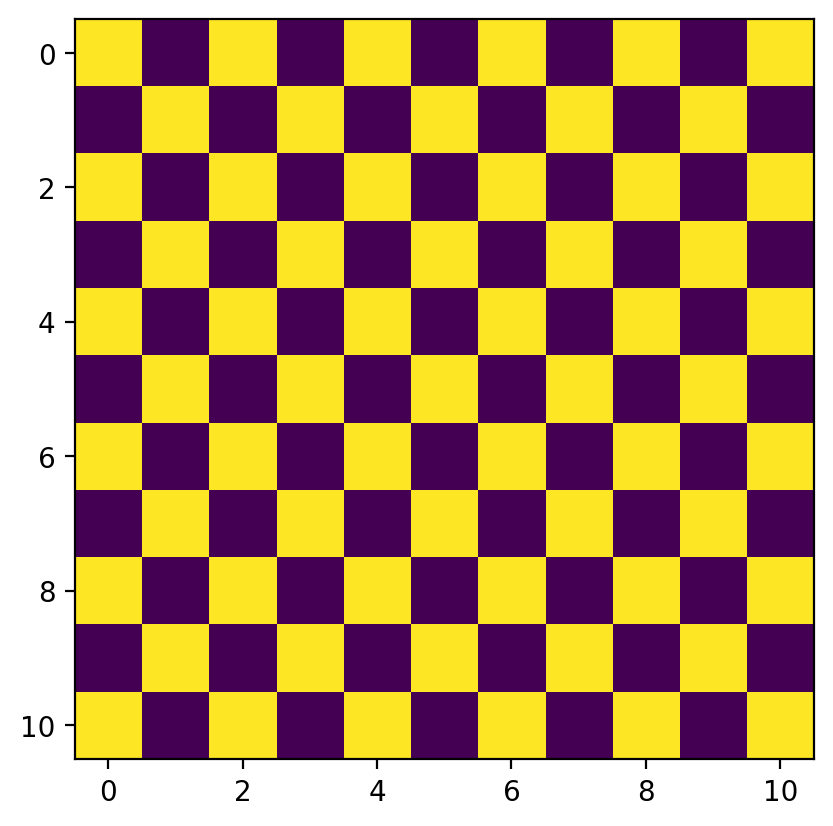

In [116]:
n = 11
data = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        if (i + j) % 2 == 0:
            data[i, j] = 1

    
plt.imshow(data, interpolation='nearest')
plt.show()

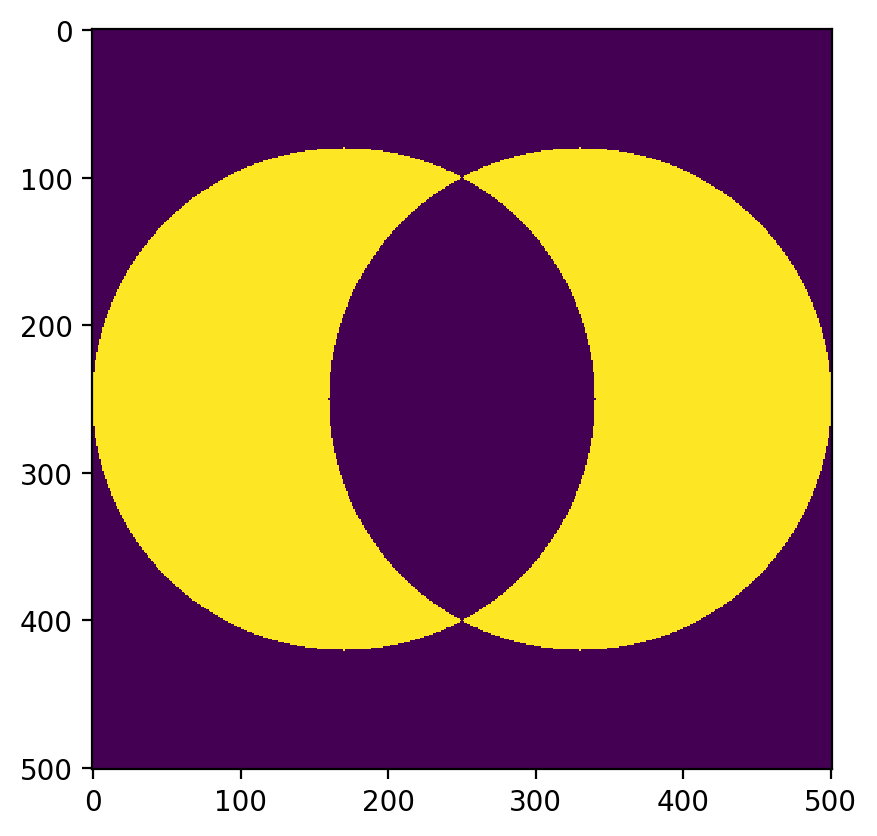

In [117]:
n = 501
data = np.zeros((n,n))

cx1, cy1 = 170, 250
cx2, cy2 = 330, 250
r = 170
Y, X = np.ogrid[:n, :n]

mask1 = (X - cx1)**2 + (Y - cy1)**2 <= r**2
mask2 = (X - cx2)**2 + (Y - cy2)**2 <= r**2

data[mask1 ^ mask2] = 1
    
plt.imshow(data, interpolation='nearest')
plt.show()

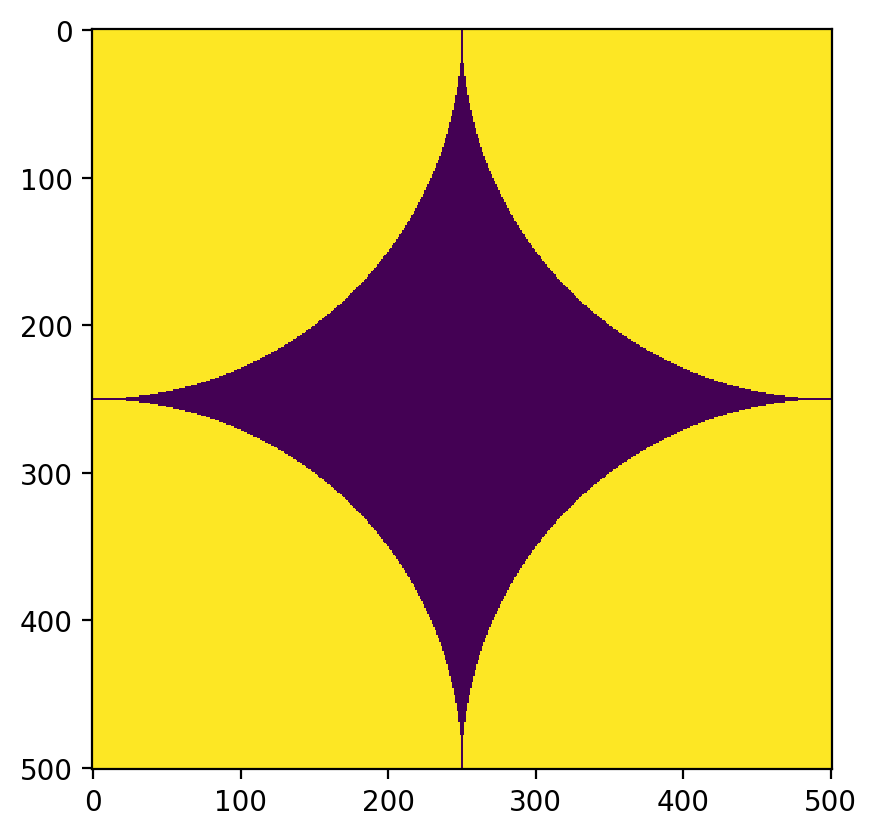

In [118]:
n = 501
data = np.zeros((n,n))

Y, X = np.ogrid[:n, :n]
r = 250

mask_tl = (X - 0)**2 + (Y - 0)**2 <= r**2
mask_tr = (X - 500)**2 + (Y - 0)**2 <= r**2
mask_bl = (X - 0)**2 + (Y - 500)**2 <= r**2
mask_br = (X - 500)**2 + (Y - 500)**2 <= r**2

data[mask_tl | mask_tr | mask_bl | mask_br] = 1

plt.imshow(data, interpolation='nearest')
plt.show()

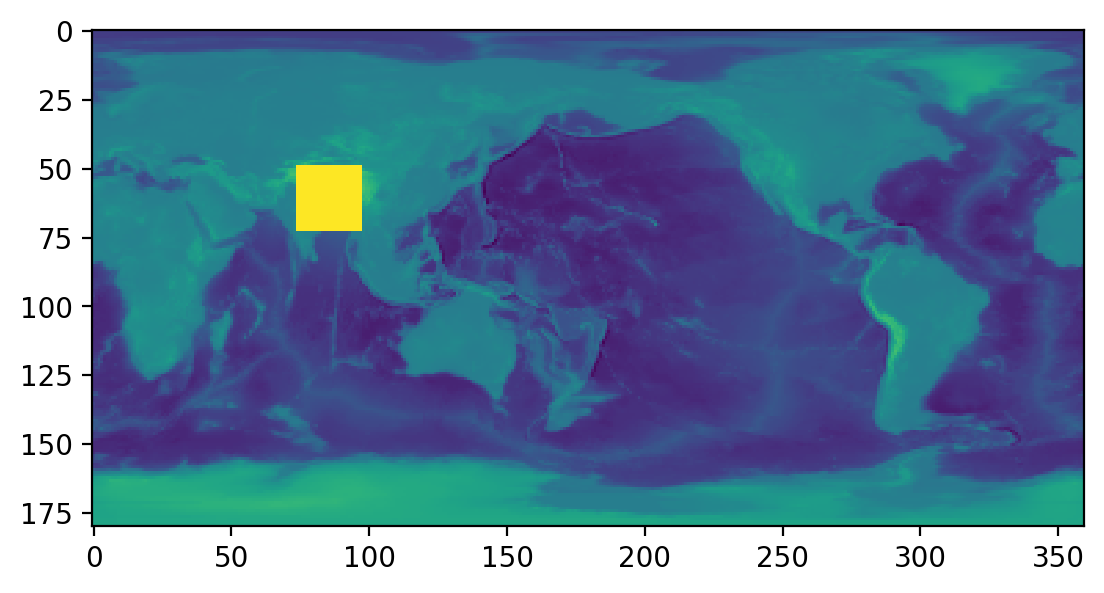

In [119]:
H = np.loadtxt('/Users/simoncha/Desktop/school/EPS 109/hw/hw2/topography_180x360_grid.txt')

H2 = H.copy()

idx = np.argmax(H2)
row, col = np.unravel_index(idx, H2.shape)

for i in range(row - 12, row + 12):
    for j in range(col - 12, col + 12):
        H2[i,j] = 10000


plt.imshow(H2, interpolation='nearest')
plt.show()


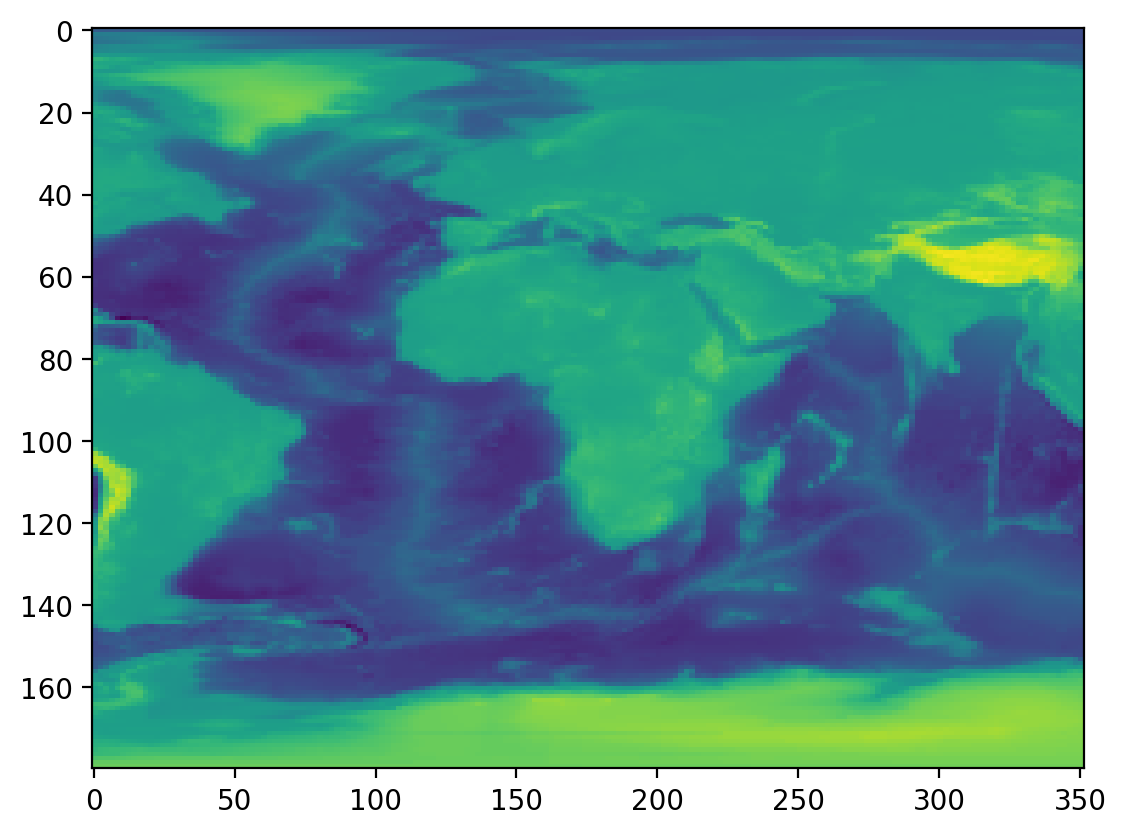

In [120]:
import numpy as np
import matplotlib.pyplot as plt

H3 = H.copy()
ny, nx = H.shape

left = H3[:, :187]
right = H3[:, 188:]
H3 = np.concatenate((right, left), axis=1)

H3[:, :100] = -10000
H3[:, 276:] = -10000

H3 = np.roll(H3, -12, axis=1)

valid_cols = ~np.all(H3 == -10000, axis=0)
idx = np.where(valid_cols)[0]
x0, x1 = idx[0], idx[-1]

sub = H3[:, x0:x1+1]
stretched_sub = np.repeat(sub, 2, axis=1)

H4 = np.full((ny, 2*nx), -10000, dtype=H3.dtype)

start = 2 * x0
end   = 2 * (x1 + 1)
H4[:, start:end] = stretched_sub

H4_window = np.repeat(sub, 2, axis=1)
plt.imshow(H4_window, interpolation='nearest', aspect='auto')
plt.show()